In [ ]:
# Basic
import os
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
import numpy as np
import pandas as pd
import cv2
import random
# visuals
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image


# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix


# Tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,MaxPooling2D,Dropout,Flatten,BatchNormalization,Conv2D
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Dense


ModuleNotFoundError: No module named 'tensorflow'

In [2]:
train_path = "C:\\Users\\tolga\\Desktop\\dogs-vs-cats\\train"
test_path = "C:\\Users\\tolga\\Desktop\\dogs-vs-cats\\test"

In [3]:
image_dir = "C:\\Users\\tolga\\Desktop\\dogs-vs-cats\\train"

filenames = os.listdir(image_dir)
labels = [x.split(".")[0] for x in filenames]

data = pd.DataFrame({"filename": filenames, "label": labels})

data.head()

,filename,label
0,cat.0.jpg,cat
1,cat.1.jpg,cat
2,cat.10.jpg,cat
3,cat.100.jpg,cat
4,cat.1000.jpg,cat


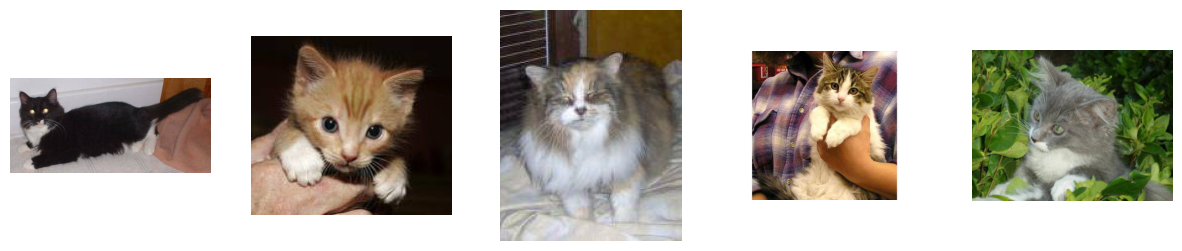

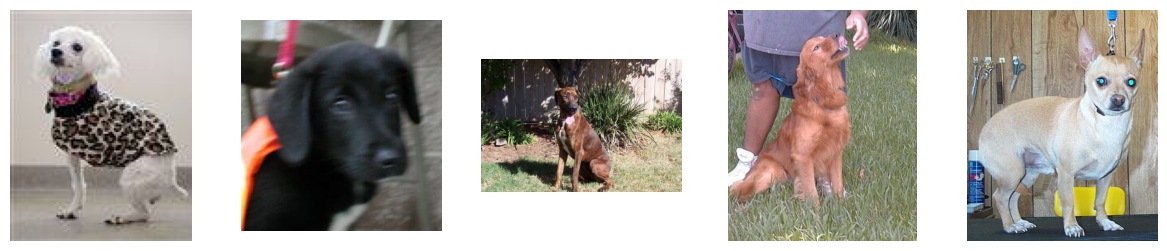

In [4]:
import os
import random
import matplotlib.pyplot as plt

def get_random_images(image_dir, class_name, num_images=5):
 
  # Tüm dosya isimlerini al
  filenames = os.listdir(image_dir)

  # Belirtilen sınıfa ait dosya isimlerini filtrele
  class_images = [filename for filename in filenames if filename.startswith(class_name)]

  # Rastgele 'num_images' adet indeks seç
  random_indices = random.sample(range(len(class_images)), num_images)

  # Seçilen indekslere karşılık gelen dosya yollarını al
  random_images = [os.path.join(image_dir, class_images[i]) for i in random_indices]

  return random_images

def visualize_images(image_paths):

  num_images = len(image_paths)
  fig, axes = plt.subplots(1, num_images, figsize=(15, 3))

  for i, img_path in enumerate(image_paths):
    img = plt.imread(img_path)
    axes[i].imshow(img)
    axes[i].axis('off')

  plt.show()


# Her çağırıldığında farklı 5 kedi ve 5 köpek resmi gösterir
random_cat_images = get_random_images(image_dir, 'cat')
random_dog_images = get_random_images(image_dir, 'dog')

visualize_images(random_cat_images)
visualize_images(random_dog_images)

In [5]:
# Görsellerin bulunduğu klasörün yolu
data_path = "C:\\Users\\tolga\\Desktop\\dogs-vs-cats\\train"

# Görüntü dosyalarını listeleme
image_files = [os.path.join(data_path, file) for file in os.listdir(data_path) if file.lower().endswith(".jpg")]

# Yükseklik ve genişlikleri tutacak listeler
heights = []
widths = []

# Görsellerin boyutlarını analiz etme
for image_path in image_files:
    img = cv2.imread(image_path) 
    if img is None:
        print(f"Uyarı: Görüntü okunamadı -> {image_path}")
        continue 
    
    h, w, _ = img.shape
    heights.append(h)
    widths.append(w)

# Yükseklik istatistikleri
max_height = np.max(heights)
min_height = np.min(heights)
mean_height = np.mean(heights)

# Genişlik istatistikleri
max_width = np.max(widths)
min_width = np.min(widths)
mean_width = np.mean(widths)

# Sonuçları yazdırma
print("Görüntü Boyutları Analizi:")
print(f"Maksimum Yükseklik: {max_height}")
print(f"Minimum Yükseklik: {min_height}")
print(f"Ortalama Yükseklik: {mean_height:.2f}")
print(f"Maksimum Genişlik: {max_width}")
print(f"Minimum Genişlik: {min_width}")
print(f"Ortalama Genişlik: {mean_width:.2f}")


Görüntü Boyutları Analizi:
Maksimum Yükseklik: 768
Minimum Yükseklik: 32
Ortalama Yükseklik: 360.48
Maksimum Genişlik: 1050
Minimum Genişlik: 42
Ortalama Genişlik: 404.10


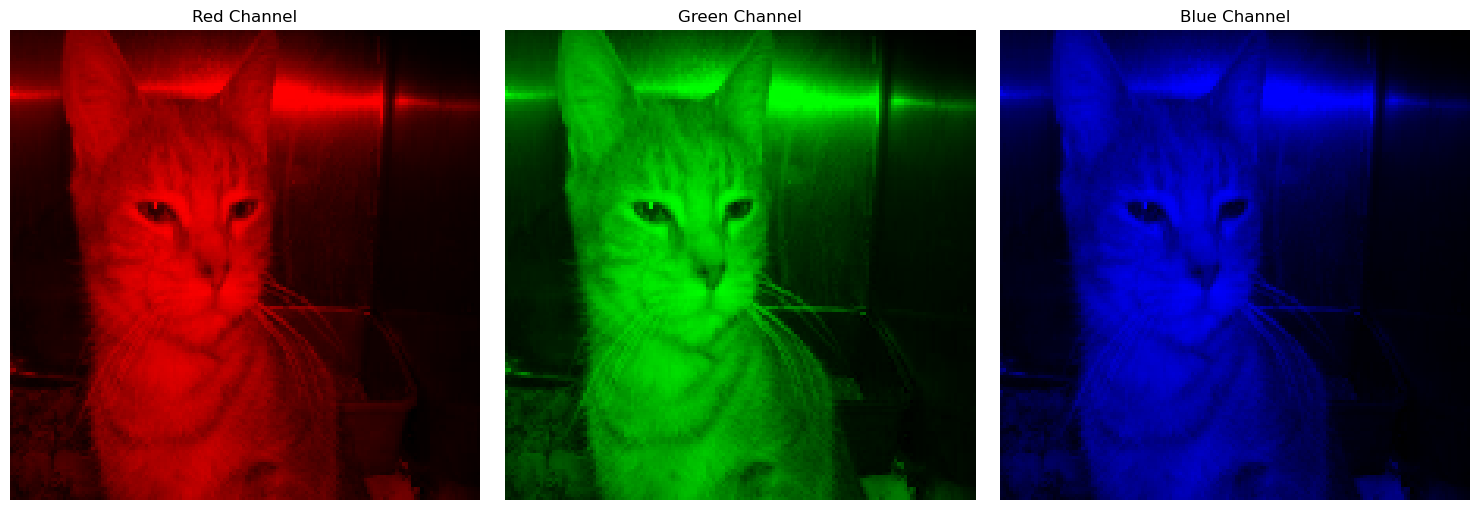

In [6]:
# Görsellerin bulunduğu klasörün yolu
data_path = "C:\\Users\\tolga\\Desktop\\dogs-vs-cats\\train"

# Görüntü dosyalarını listeleme
image_files = [os.path.join(data_path, file) for file in os.listdir(data_path) if file.lower().endswith(".jpg")]

# Görsel seçim fonksiyonu
def view_random_image():
# Rastgele bir görsel seçme
    image_path = random.choice(image_files)  
    img = load_img(image_path, target_size=(150, 150))
    return img_to_array(img) / 255.0  

# Rastgele bir görseli seçme
img_array = view_random_image()

# Renk kanallarını kopyalama
R = img_array.copy()
G = img_array.copy()
B = img_array.copy()

# Sadece ilgili kanalları ayırma
R[:, :, 1:] = 0  
G[:, :, [0, 2]] = 0  
B[:, :, :2] = 0

# Kanalları görselleştirme
plt.figure(figsize=(15, 5))

for i, (channel, title) in enumerate(zip([R, G, B], ['Red', 'Green', 'Blue']), 1):
    plt.subplot(1, 3, i) 
    plt.imshow(np.squeeze(channel))  
    plt.title(f"{title} Channel") 
    plt.axis("off") 

plt.tight_layout()
plt.show()


In [7]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Görsellerin bulunduğu dizin
train_dir = "C:\\Users\\tolga\\Desktop\\dogs-vs-cats\\train"  # Eğitim görselleri dizini

# Eğitim verisi için dosya adlarını alma
train_filenames = [f for f in os.listdir(train_dir) if f.endswith('.jpg')]  # Sadece .jpg dosyaları

# Etiketleme işlemi: 'cat' içeren dosya adlarını 0, 'dog' içeren dosya adlarını 1 olarak etiketliyoruz
train_labels = [0 if 'cat' in filename else 1 for filename in train_filenames]

# DataFrame oluşturma
data = pd.DataFrame({
    'filename': train_filenames,
    'label': train_labels
})

# Eğitim ve test verilerini ayırma
X_train, X_temp, y_train, y_temp = train_test_split(
    data['filename'], data['label'], test_size=0.2, stratify=data['label'], random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

# DataFrame oluşturma
X_train = pd.DataFrame({'filename': X_train, 'label': y_train.astype(str)})
X_val = pd.DataFrame({'filename': X_val, 'label': y_val.astype(str)})
X_test = pd.DataFrame({'filename': X_test, 'label': y_test.astype(str)})








In [8]:
# Parametreler
image_size = 128  # Görüntü boyutu
image_channel = 3  # RGB kanal sayısı
bat_size = 32  # Batch boyutu

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=10,
    brightness_range=(0,85),
    width_shift_range=0.002,
    height_shift_range=0.002,
    shear_range=12.5,
    zoom_range=0.0,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0/255)
val_datagen = ImageDataGenerator(rescale=1.0/255)

# Batch boyutunu tanımlayın
batch_size = 32


In [9]:
# Verileri DataFrame'den oluştur
if X_train.empty or X_val.empty or X_test.empty:
    raise ValueError("Veri DataFrame'leriniz boş! Verilerinizi kontrol edin.")

# Eğitim generator'ı
train_generator = train_datagen.flow_from_dataframe(
    dataframe=X_train,
    directory=train_dir,
    x_col='filename',
    y_col='label',
    batch_size=bat_size,
    target_size=(image_size, image_size),
    class_mode='binary',  # Binary sınıflandırma
    shuffle=True
)

val_generator = test_datagen.flow_from_dataframe(
    dataframe=X_val,
    directory=train_dir,
    x_col='filename',
    y_col='label',
    batch_size=bat_size,
    target_size=(image_size, image_size),
    class_mode='binary',
    shuffle=False
)

# Test verisi için generator
test_generator = test_datagen.flow_from_dataframe(
    dataframe=X_test,
    directory=train_dir,
    x_col='filename',
    y_col='label',
    batch_size=bat_size,
    target_size=(image_size, image_size),
    class_mode='binary',
    shuffle=False
)



Found 20000 validated image filenames belonging to 2 classes.
Found 2500 validated image filenames belonging to 2 classes.
Found 2500 validated image filenames belonging to 2 classes.


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow import keras
from keras import optimizers
from tensorflow.keras.optimizers import SGD


# Modelin başlangıcı
model = Sequential()

# İlk katman: Görüntülerin boyutu 128x128, 3 kanal (RGB)
model.add(Conv2D(32, (4, 4), activation='relu', input_shape=(128, 128, 3)))  # Burada giriş şekli tanımlanıyor
model.add(MaxPooling2D(pool_size=(2, 2)))

# Konvolüsyonel Katmanlar
model.add(Conv2D(32, (4, 4), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (4, 4), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (4, 4), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (4, 4), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Tam Bağlantılı Katmanlar (Fully Connected)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.7))

# Çıkış Katmanı (Binary sınıflandırma için uygun çıkış)
model.add(Dense(1, activation='sigmoid'))

# Modelin derlenmesi
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Modelin özeti
model.summary()

# Callback'ler
early_stopping = EarlyStopping(
    monitor='val_loss',  # Doğrulama kaybı izlenecek
    patience=3,  
    restore_best_weights=True,  # En iyi ağırlıklar geri yüklenecek
    verbose=1  # İlerleme bilgisi gösterilsin
)

learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_loss',  # Doğrulama kaybına göre izleme yapılacak
    patience=3,  # Sabırlı olunacak epoch sayısı
    factor=0.5,  # Öğrenme oranı her seferinde yarıya indirilecek
    min_lr=1e-6,  # Minimum öğrenme oranı
    verbose=1  # İlerleme bilgisi gösterilsin
)


C:\Users\tolga\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 125, 125, 32)        │           1,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 59, 59, 32)          │          16,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 59, 59, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 29, 29, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 29, 29, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 64)          │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 26, 26, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 10, 10, 128)         │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 10, 10, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 2, 2, 256)           │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 2, 2, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 842,625 (3.21 MB)

 Trainable params: 840,641 (3.21 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)

# Model eğitme
cat_dog = model.fit(
    train_generator,
    epochs=20,  # Daha uzun eğitim süresi
    verbose=1,
    validation_data=val_generator,
    callbacks=[early_stopping, learning_rate_reduction]
)


# Modelin değerlendirilmesi
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")



Epoch 1/20


C:\Users\tolga\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 493s 779ms/step - accuracy: 0.5141 - loss: 0.9749 - val_accuracy: 0.4996 - val_loss: 1.2667 - learning_rate: 0.0010
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 503s 795ms/step - accuracy: 0.5222 - loss: 0.7410 - val_accuracy: 0.4896 - val_loss: 0.6935 - learning_rate: 0.0010
Epoch 3/20
488/625 ━━━━━━━━━━━━━━━━━━━━ 1:49 800ms/step - accuracy: 0.5442 - loss: 0.7078

In [ ]:
import matplotlib.pyplot as plt

history = cat_dog  # fit işleminin döndürdüğü history nesnesi

# Eğitim ve doğrulama doğrulukları
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Eğitim ve doğrulama kayıpları
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix hesaplama ve görselleştirme
confusion_mtx = confusion_matrix(y_true, y_pred)

# Görselleştirme
plt.figure(figsize=(10, 6), dpi=150)  
sns.heatmap(
    confusion_mtx, 
    annot=True,  
    fmt='.0f',  
    cmap="Blues", 
    linewidths=0.5, 
    linecolor="black",  
    cbar=False, 
    xticklabels=labels, 
    yticklabels=labels 
)

# Eksen etiketleri ve başlık
plt.xlabel("Predicted Label", fontsize=12, labelpad=10)
plt.ylabel("True Label", fontsize=12, labelpad=10)
plt.title("Confusion Matrix", fontsize=15, pad=15)

# Eksen yazı tipi boyutları
plt.xticks(fontsize=10, rotation=45, ha='right')  
plt.yticks(fontsize=10)

plt.tight_layout()  
plt.show()
